# Multiobjective Optimization

## Imports

In [1]:
from tqdm.notebook import tqdm
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True) # for better printing
sns.set_style("darkgrid")

# Nondominated Sorting Genetic Algorithm II (NSGA-II)

Paper NSGA:
> Srinivas, Nidamarthi, and Kalyanmoy Deb. "Muiltiobjective optimization using nondominated sorting in genetic algorithms." Evolutionary computation 2, no. 3 (1994): 221-248.

Paper NSGA-II:
> Deb, Kalyanmoy, Samir Agrawal, Amrit Pratap, and Tanaka Meyarivan. "A fast elitist non-dominated sorting genetic algorithm for multi-objective optimization: NSGA-II." In Parallel Problem Solving from Nature PPSN VI: 6th International Conference Paris, France, September 18–20, 2000 Proceedings 6, pp. 849-858. Springer Berlin Heidelberg, 2000.

The princinple of NSGA-II is illustrated in the following:

<img src="assets/nsga.png" width="800">


### NSGA flowchart from lecture:
<img src="assets/nsga_flowchart.png" width="600">
Modified illustration from Srinivas & Deb 1994.

### Optimization steps:
In this exercise, we will implement the following steps to program the NSGA algorithm. Afterwards, we will modify our code to the NSGA-II algorithm.
1. **Initialisation**: Create an initial population of random solutions.
2. **Fitness Evaluation**: Evaluate the fitness of each solution based on the objectives.
3. **Non-dominated Sorting**: Sort the population into different fronts based on Pareto dominance.
4. **Selection**: Select parents for reproduction (e.g., using a tournament selection method based on rank and crowding distance).
5. **Crossover and Mutation**: Generate new offspring by applying crossover and mutation operators.
6. **Survivor Selection**: Merge parents and offspring and select the best solutions for the next generation.


## Step 1: Initialise population

In [2]:
def initialise_population(population_size, num_parameters):
    population = ...
    return population

In [3]:
# Solution
def initialise_population(population_size, num_parameters, value_range=None):
    if value_range is not None:
        values  = [np.random.uniform(low=value_range[i][0], high=value_range[i][1], size=(population_size,)) for i in range(num_parameters)]
        return np.array(values).T
        
    return np.random.uniform(low=0.2, high=1.0, size=(population_size, num_parameters))

In [29]:
population_size = 16
num_parameters = 2

population = initialise_population(population_size, num_parameters)

print(f"Population:\n{population}")
assert type(population) == np.ndarray

population = initialise_population(population_size, num_parameters, value_range=[(-5, 50), (1e3, 1e4)])

print(f"Population:\n{population}")
assert type(population) == np.ndarray

Population:
[[0.8165 0.9834]
 [0.6979 0.6966]
 [0.3624 0.4131]
 [0.4273 0.536 ]
 [0.6745 0.8626]
 [0.6089 0.5582]
 [0.9513 0.2604]
 [0.427  0.2316]
 [0.9949 0.6455]
 [0.2251 0.7686]
 [0.2581 0.2188]
 [0.3101 0.8306]
 [0.3807 0.9244]
 [0.3198 0.7254]
 [0.7797 0.7612]
 [0.5166 0.8594]]
Population:
[[  22.7086 5796.218 ]
 [  -4.0778 4573.839 ]
 [  45.1798 2110.2286]
 [  46.7676 4477.3021]
 [  12.4392 8495.4548]
 [   4.3696 4717.3133]
 [  36.34   3755.7274]
 [  28.2268 2727.9241]
 [  -0.2507 8426.5474]
 [  37.5128 1077.2069]
 [  13.7059 1888.8776]
 [  27.6073 6489.537 ]
 [  28.1587 4568.5796]
 [   5.8462 6231.1054]
 [   2.913  8701.9758]
 [  48.7099 5849.5423]]


## Step 2: Multi-objective fitness evaluation

In [5]:
def evaluate_population(population, objective_functions):
    fitness = ...
    
    return fitness

In [6]:
# Solution
def evaluate_population(population, objective_functions):
    fitness = []
    for individual_no in range(population.shape[0]):
        individual = population[individual_no, :]
        # uses list comprehension --> other way to use for loop.
        fitness_objectives = [objective(*individual) for objective in objective_functions]
        fitness.append(fitness_objectives)
    return np.array(fitness)

In [7]:
# Test your function:
population_size = 20
num_parameters = 2

def f_sum(x, y):
    return np.sum([x,y])

def f_mean(x, y):
    return np.mean([x,y])

def f_min(x, y):
    return np.min([x,y])

def f_constant(x, y):
    return np.pi

value = np.array([1.2, 0.5])
print(f_sum(*value))

population = initialise_population(population_size, num_parameters)

# the objective list stores functions without assigned values.
# You can iterate through objective functions and later assign values.
objective_functions = [f_sum, f_mean, f_min, f_constant]

multi_fitness = evaluate_population(population, objective_functions)
print(f"Population multiobjective fitness:\n{multi_fitness}")

assert type(multi_fitness) == np.ndarray

1.7
Population multiobjective fitness:
[[1.5367 0.7683 0.5609 3.1416]
 [1.2927 0.6464 0.5135 3.1416]
 [1.0135 0.5067 0.4495 3.1416]
 [1.0556 0.5278 0.4755 3.1416]
 [1.1699 0.585  0.4511 3.1416]
 [0.7732 0.3866 0.3217 3.1416]
 [1.0368 0.5184 0.3409 3.1416]
 [0.9487 0.4743 0.4051 3.1416]
 [1.4776 0.7388 0.5147 3.1416]
 [1.4748 0.7374 0.4941 3.1416]
 [1.6497 0.8249 0.7718 3.1416]
 [1.51   0.755  0.7158 3.1416]
 [0.959  0.4795 0.237  3.1416]
 [1.4777 0.7388 0.6851 3.1416]
 [1.3695 0.6848 0.6466 3.1416]
 [1.572  0.786  0.6494 3.1416]
 [1.5614 0.7807 0.6809 3.1416]
 [1.1776 0.5888 0.3103 3.1416]
 [0.9151 0.4576 0.2171 3.1416]
 [0.956  0.478  0.2189 3.1416]]


## Step 3: Non-dominated Sorting

First we have to specify, when a solution dominates another. Remember, a solution dominates another if:
1. $\exists i \in {1, \dots, k}, f_i(x) \leq f_i(y)$ --> Solution ($x$) is no worse than Solution ($y$) in all objectives.
2. $\exists i \in {1, \dots, k}, f_i(x) < f_i(y)$ --> Solution ($x$) is strictly better than Solution ($y$) in at least one objective.



In [8]:
def dominates(individual_1, individual_2):
    return ... # boolean return

In [9]:
# Solution
def dominates(individual, other_individual):
    return (all(x >= y for x, y in zip(individual, other_individual)) and
            any(x > y for x, y in zip(individual, other_individual)))

Dominance: False


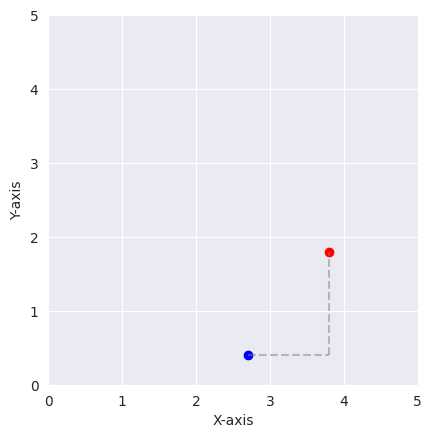

In [10]:
# Test function:
fitness_other_individual = np.array([3.8, 1.8])
fitness_individual = np.array([2.7, 0.4])

dominance = dominates(fitness_individual, fitness_other_individual)
print(f"Dominance: {dominance}")

# Plotting distances
x1, y1 = fitness_individual
x2, y2 = fitness_other_individual

# Draw horizontal and vertical lines for distance
plt.plot([x1, x2], [y1, y1], color='grey', linestyle='--', alpha=0.5)  # Horizontal line
plt.plot([x2, x2], [y1, y2], color='grey', linestyle='--', alpha=0.5)  # Vertical line

plt.scatter(*fitness_individual, color='blue')
plt.scatter(*fitness_other_individual, color='red')

plt.xlim([0.0, 5.0])
plt.ylim([0.0, 5.0])
plt.gca().set_aspect('equal', adjustable='box')

# Adding labels and title for clarity
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()

## Nondominant sorting / find Pareto fronts
Core element of this algorithm is the nondominant sorting into Pareto fronts. For an efficient implementation of the non-dominant sorting, we split this step into two functions.

<img src="assets/fast_nondominated_sort.png" width="550">

### Source:
> Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan. "A fast and elitist multiobjective genetic algorithm: NSGA-II." IEEE transactions on evolutionary computation 6, no. 2 (2002): 182-197. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=996017

----
### **Assignment**
Implement the function `evaluate_dominance`. The function evaluates for every combination of candidate fitness values, if one solution dominates or is dominated by another solution. We collect how often one specific solution is dominated and from which solutions it is dominated.
1. We create a list with the index of every solution which the 
2. We create a list with a count how many times the respective solution is dominated for every solution
3. Create a list, which we will use to directly collect our first Pareto front.
----

In [11]:
# finds Pareto fronts
def fast_nondominated_sort(fitness): 
    domination_lists = [[] for _ in range(len(fitness))]
    domination_counts = [0 for _ in range(len(fitness))]
    population_rank = [0 for _ in range(len(fitness))]
    pareto_fronts = [[]]

    for individual_a in range(len(fitness)):
        for individual_b in range(len(fitness)):
            
            # does candidate 1 dominate candidate 2?
            if dominates(fitness[individual_a], fitness[individual_b]):
                # append index of dominating solution
                domination_lists[individual_a].append(individual_b)
            
            # does candidate 2 dominate candidate 1?
            elif dominates(fitness[individual_b], fitness[individual_a]):
                # 
                domination_counts[individual_a] += 1
        
        # if solution dominates all
        if domination_counts[individual_a] == 0:
            # placeholder solution rank
            population_rank[individual_a] = 0
            
            # add solution to first Pareto front
            pareto_fronts[0].append(individual_a)
    
    # iterates until there are no more items appended in the last front 
    i = 0
    while pareto_fronts[i]:
        # open next front
        next_front = []
        
        # iterate through all items in previous front
        for individual_a in pareto_fronts[i]:
            
            # check all other items which are dominated by this item
            for individual_b in domination_lists[individual_a]:
                # reduce domination count
                domination_counts[individual_b] -= 1
                
                # every now nondominated item are append to next front
                if domination_counts[individual_b] == 0:
                    
                    # add solution rank
                    population_rank[individual_b] = i + 1
                    next_front.append(individual_b)
                    
        i += 1
        
        pareto_fronts.append(next_front)
    
    # removes last empty front
    pareto_fronts.pop()
    
    return pareto_fronts, population_rank

Number of discovered Pareto fronts: 47


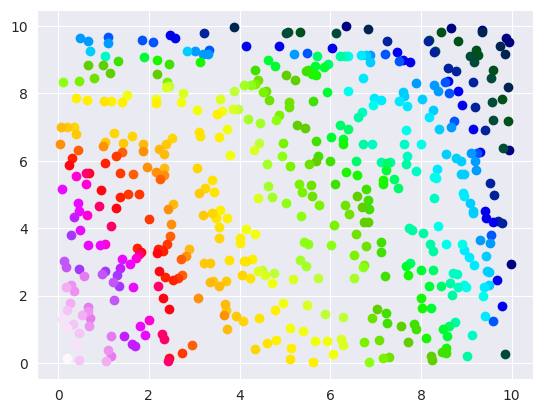

In [12]:
# Test your function:
population_size = 512
num_parameters = 8
num_objectives = 2

population = np.random.uniform(size=(population_size, num_parameters))
fitness = 10.0 * np.random.uniform(size=(population_size, num_objectives))

pareto_fronts, population_rank = fast_nondominated_sort(fitness)
print(f"Number of discovered Pareto fronts: {len(pareto_fronts)}")
      
fig, ax = plt.subplots()
color_map = plt.cm.gist_ncar(np.linspace(0, 1, len(pareto_fronts)))
for i, front in enumerate(pareto_fronts):
    values = fitness[front]
    ax.scatter(values[:, 0], values[:, 1], color=color_map[i])

plt.show()

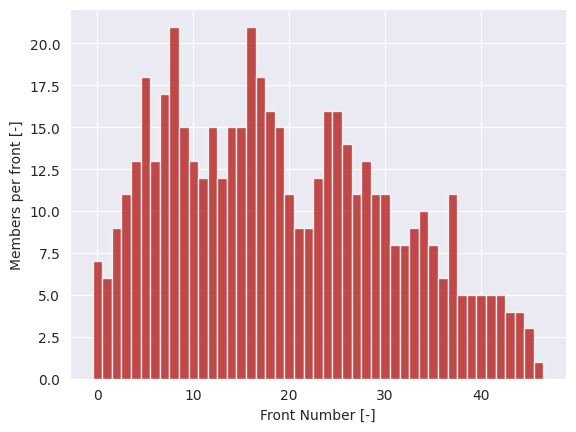

In [13]:
num_bins = len(pareto_fronts)

fig, ax = plt.subplots()

# Create the histogram on the specified axis
ax.hist(population_rank, np.arange(num_bins+1)-0.5, color="#B51F1F", alpha=0.8)

# Adding labels and title
ax.set_xlabel('Front Number [-]')
ax.set_ylabel('Members per front [-]')

plt.show()

## Crowding distance

Crowding distance is a measure of how dense the solutions are in the objective function space. In NSGA-II, it is used to estimate the density of solutions surrounding a particular solution in the population. The crowding distance of a solution is calculated as the average distance to its neighbors in each of the objectives. In the following is the pseudocode as specified by Deb et al. (2002):

<img src="assets/crowding_distance_assignment.png" width="750">

### Source:

> Deb, Kalyanmoy, Amrit Pratap, Sameer Agarwal, and T. A. M. T. Meyarivan. "A fast and elitist multiobjective genetic algorithm: NSGA-II." IEEE transactions on evolutionary computation 6, no. 2 (2002): 182-197. https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=996017

----
### **Assignment**
Implement the `compute_crowding_distance`-function according to the pseudocode of Deb. Adapt the code to the given interfaces.

### **Hint**
Python indices start with Zero. In the publication of Deb, the index starts from One. 

----

In [14]:
def compute_crowding_distance(fitness, front):
    distance = ...
    return distance

In [15]:
# Solution
def compute_crowding_distance(fitness, front):
    num_objectives = fitness.shape[1]
    distance = np.zeros(len(front))

    for i in range(num_objectives):
        front_fitness = [fitness[p][i] for p in front]
        sorted_indices = np.argsort(front_fitness)
        
        max_f = np.max(front_fitness)
        min_f = np.min(front_fitness)
        
        distance[sorted_indices[0]] = distance[sorted_indices[-1]] = np.inf

        scale = (max_f - min_f)
        for j in range(1, len(front) - 1):
            distance[sorted_indices[j]] += (front_fitness[sorted_indices[j + 1]] - front_fitness[sorted_indices[j - 1]]) / scale

    return distance

In [28]:
# Test function:
population_size = 64
num_objectives = 2

fitness = 10 * np.random.uniform(size=(population_size, num_objectives))
fronts, population_rank = fast_nondominated_sort(fitness)

front = fronts[4]

print(f"Number of Pareto fronts: {len(fronts)}")
print(f"Members of front: {front}")
distance = compute_crowding_distance(fitness, front)
print(f"Crowding distances: {distance}")

Number of Pareto fronts: 13
Members of front: [22, 9, 8, 3, 14, 21, 15, 48]
Crowding distances: [   inf 0.8847 0.6434 0.3115 0.3931    inf 0.6118 0.4405]


## Crowding Operator
The crowding operator checks which individual is better in a multi-objective problem based on the rank or the crowding distance.

In [17]:
def crowding_operator(individual_index, other_individual_index, population_rank, crowding_distances):
    ...

In [18]:
# Solution 1
def crowding_operator(individual_index, other_individual_index, population_rank, crowding_distances):
    if population_rank[individual_index] < population_rank[other_individual_index]:
        return individual_index
    elif population_rank[individual_index] > population_rank[other_individual_index]:
        return other_individual_index
    else:
        if crowding_distances[individual_index] > crowding_distances[other_individual_index]:
            return other_individual_index
        elif crowding_distances[individual_index] < crowding_distances[other_individual_index]:
            return individual_index
        else:
            raise

In [19]:
# Solution 2
def crowding_operator(individual_index, other_individual_index, population_rank, crowding_distances):
    if population_rank[individual_index] < population_rank[other_individual_index]:
        return individual_index
    
    if population_rank[individual_index] < population_rank[other_individual_index] and crowding_distances[individual_index] < crowding_distances[other_individual_index]:
        return individual_index
    
    return other_individual_index

## Step 4: Crossover and Mutation

### Mutation
We mutate the parameters of our population. This is analog to the implementation of GA, however, here we are using a real-valued representation of our genotype.

In [20]:
def mutate_population(population, mutation_probability):
    mutated_population = ...
    return mutated_population

In [21]:
# Solution 1:
def mutate_population(population, mutation_probability):
    mutated_population = population.copy()
    rows, cols = population.shape
    for i in range(rows):
        for j in range(cols):
            if np.random.randn() <= mutation_probability:
                mutated_population[i][j] += np.random.normal()
    return mutated_population

In [22]:
# Solution 2:
def mutate_population(population, mutation_probability):
    mutation_mask = np.random.rand(*population.shape) < mutation_probability
    mutation_mask = mutation_mask.astype(np.float64)
    
    mutation = np.random.normal(size=(population.shape))
    mutation = np.multiply(mutation_mask, mutation)
    
    population = population + mutation
    return population

In [23]:
# Test implementation:
population_size = 10
num_parameter = 8
mutation_probability = 0.5

population = np.random.uniform(size = (population_size, num_parameter))
mutated_population = mutate_population(population, mutation_probability)

print(f"Changes to population:\n{population - mutated_population}")

Changes to population:
[[ 0.     -0.7204 -0.3532 -0.5971  0.      0.4478  0.     -1.104 ]
 [-1.4442 -0.7755 -0.7067  1.1366 -0.337   0.      0.      0.    ]
 [-1.2567 -1.3561  0.      0.7956 -0.7827  0.      0.      0.    ]
 [ 1.5989  0.      0.      1.4696  0.      0.      0.      0.    ]
 [ 0.      1.0827 -0.1634  0.      0.1053  0.6634  0.      0.308 ]
 [ 0.      0.4713  0.      0.      0.7235  1.3164  0.2332  0.8295]
 [ 0.      0.2578  0.      0.      1.4099  0.     -0.1527  0.    ]
 [ 0.      0.      0.      0.      1.8862 -0.3869  0.      2.0046]
 [ 0.      0.      0.6411  0.     -2.0506  0.     -1.1246  1.7479]
 [-0.4114  0.      0.      0.9172  0.      0.8511  0.2017  0.9061]]


### One-point Crossover
We use a one-point crossover here analog to the implementation in GA. No modifications for different representations required.

In [24]:
# Solution
def stochastic_one_point_crossover(parent_1, parent_2, crossover_probability):
    parent_1 = parent_1.reshape(1, -1)
    parent_2 = parent_2.reshape(1, -1)
    
    if np.random.rand() >= crossover_probability:
        return parent_1, parent_2
    
    idx = np.random.randint(low=1, high=parent_1.shape[1])
    
    child_1 = np.concatenate((parent_1[0, :idx], parent_2[0, idx:]))
    child_2 = np.concatenate((parent_2[0, :idx], parent_1[0, idx:]))
    
    child_1 = child_1.reshape(1, -1)
    child_2 = child_2.reshape(1, -1)
    
    return child_1, child_2

In [25]:
# test function:
num_parameter = 8
crossover_probability = 1.0

parent_1 = np.random.uniform(size=(1, num_parameter))
parent_2 = np.random.uniform(size=(1, num_parameter))

child_1, child_2 = stochastic_one_point_crossover(parent_1, parent_2, crossover_probability)

print(f"Parent 1:\n{parent_1}\nParent 2:\n{parent_2}\n")
print(f"Child 1:\n{child_1}\nChild 2:\n{child_2}")

Parent 1:
[[0.1807 0.3665 0.2692 0.208  0.2335 0.0805 0.401  0.7185]]
Parent 2:
[[0.5541 0.8327 0.8111 0.3    0.1982 0.6092 0.5495 0.3943]]

Child 1:
[[0.1807 0.3665 0.2692 0.3    0.1982 0.6092 0.5495 0.3943]]
Child 2:
[[0.5541 0.8327 0.8111 0.208  0.2335 0.0805 0.401  0.7185]]


## Step 5: Survivor Selection - binary tournament selection
For comparing different solutions, we use the rank and crowding distance to compare solutions in the tournament selection.

In [26]:
# Solution
def tournament_selection(tournament_size, population_rank, crowding_distances):
    population_size = len(population_rank)
    contestants = np.random.randint(population_size, size=(tournament_size,))
    
    best_index = 0
    for competitor_index in np.nditer(contestants):
        winner_index = crowding_operator(best_index, competitor_index, population_rank, crowding_distances)
        best_index = winner_index
        
    return best_index

In [27]:
# test functions:
population_size = 8
tournament_size = 8

population_rank = np.array([2, 1, 0, 2, 2, 1, 3, 4])
crowding_distances = np.array([0.2, 0.5, 0.8, 1.1, 1.8, 0.7, 0.8, np.inf])

best_index = tournament_selection(tournament_size, population_rank, crowding_distances)

print(f"Best index: {best_index}")

Best index: 2
